<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Machine_Learning_IU_Labs/blob/main/Lab2_self_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

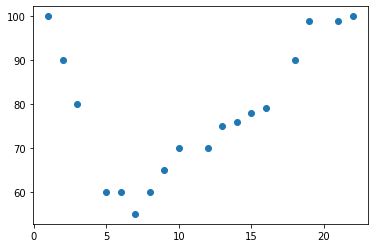

In [1]:
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error



x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

### Linear regression
Let's apply a linear regression model on the above dataset

In [2]:
X = np.reshape(np.array(x), (-1,1)) 
X

array([[ 1],
       [ 2],
       [ 3],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [12],
       [13],
       [14],
       [15],
       [16],
       [18],
       [19],
       [21],
       [22]])

In [3]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# write one line code to train the model on the dataset
linear_regression.fit(X, y)

LinearRegression()

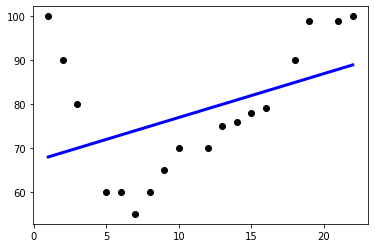

In [5]:

# write one line code to predict the dataset by the model
y_pred = linear_regression.predict(X)

plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)

plt.show()


Is our model underfitting or overfitting? Why?

Let's calculate the MSE to compare with the polynomial regression later.

In [6]:
# Calculate the MSE error, one line code
from sklearn.metrics import mean_squared_error
mse_linear_model = mean_squared_error(y, y_pred, squared=True) # if sqaured = False then returns RMSE

print("Mean squared error: %.2f" % mse_linear_model)

Mean squared error: 179.61


Now, let's try polynomial regression with different degrees

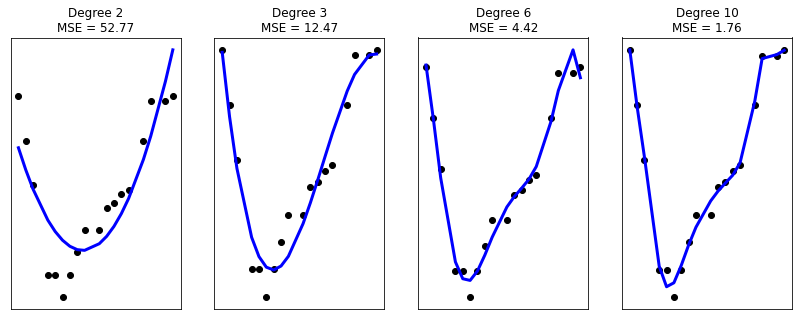

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degrees = [2, 3, 6, 10]
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    degree = degrees[i]
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()

    # write 2 lines of code to create a pipeline that contains
    #   polynomial_features and linear_regression;
    #   also fit the created pipeline on the X dataset
    pipeline = make_pipeline(polynomial_features, linear_regression)
    
    pipeline.fit(X, y)
    y_predicted_poly2 = pipeline.predict(X)

    # write one line bewlow to calculate the MSE
    mse_error_poly = mean_squared_error(y, y_predicted_poly2, squared=True) # if sqaured = False then returns RMSE

    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    plt.scatter(X, y, color="black")
    plt.plot(X, y_predicted_poly2, color="blue", linewidth=3)
    plt.title("Degree {}\nMSE = {:.2f}".format(degree, mse_error_poly))

plt.show()

MSE is decreasing while we increase the number of degrees in PL, but does this mean that we can choose the PL model with the highest number of degrees?